# In-Class Quiz Nº 2

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: Ana Sofia Oliveira
## Number: 39275

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANTE:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q2.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

<hr style="border:2px solid black"> </hr>

# Data: kMNIST dataset (small version) - pickle file $\texttt{kMNISTsmall.p}$
## This file has the following variables (in a dictionary)
* ### X1: training data ($10000\times(28\times28)$  uint8 array)
* ### y1: classes of the training data (10 japanese characters, class-numbers 0 to 9)
* ### X2: test data ($5000\times(28\times28)$ uint8 array)
* ### y2: classes of the test data (10 japanese characters, class-numbers 0 to 9)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.decomposition import PCA

import pickle
from time import time

#load data
D=pickle.load(open('kMNISTsmall.p','rb'))
X1=D.X1/255.
X2=D.X2/255.
y1=D.y1
y2=D.y2

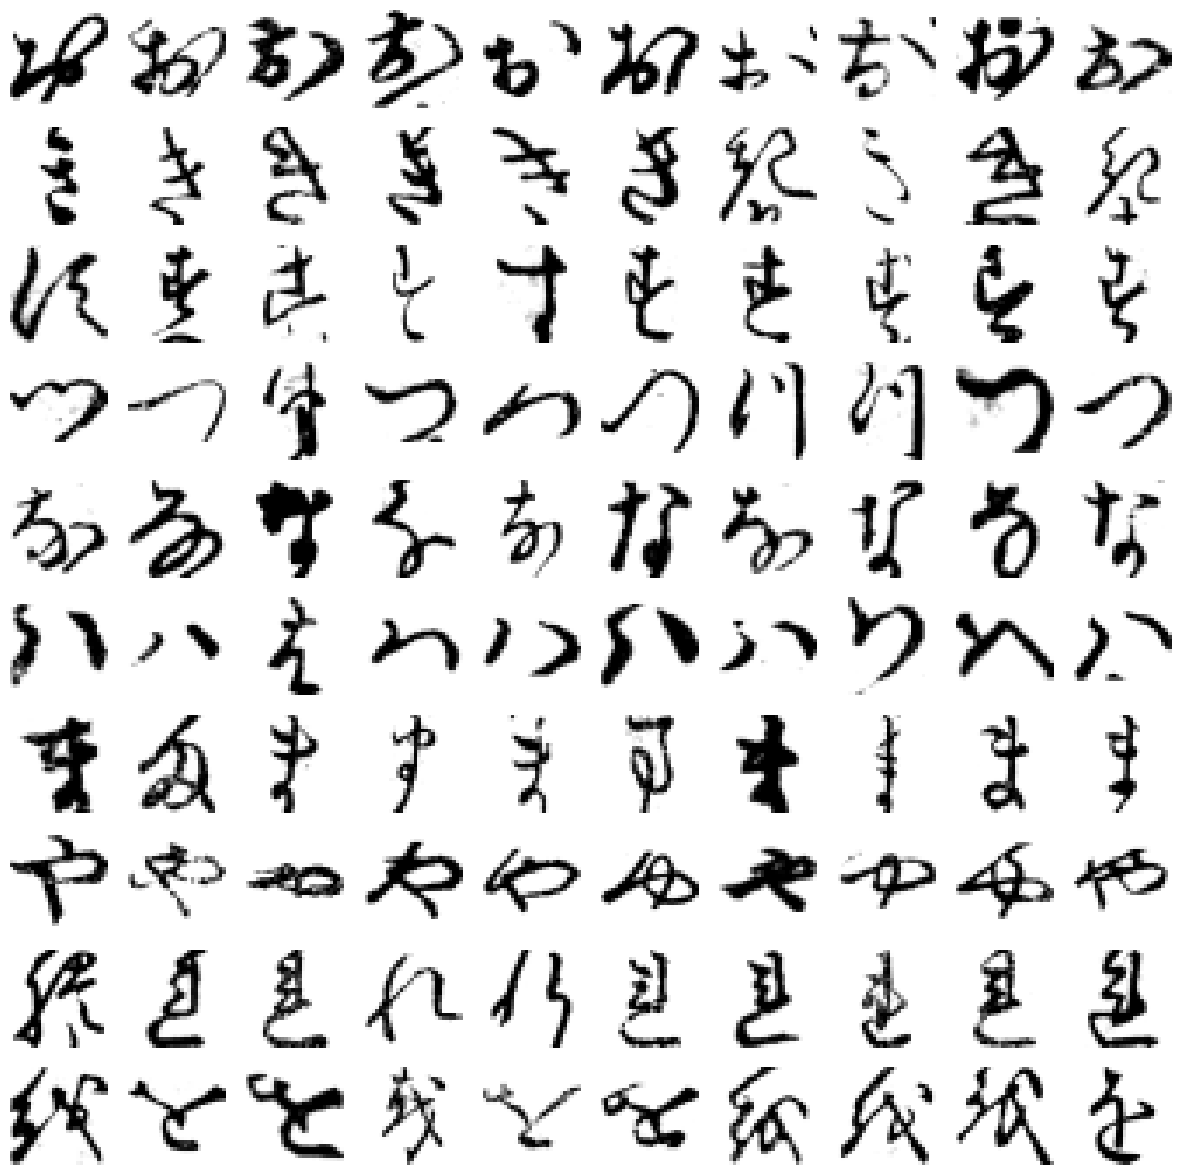

In [2]:
plt.figure(figsize=(15,15))
c=1
for i in range(10):
    A=X1[y1==i]
    for j in range(10):
        plt.subplot(10,10,c)
        c+=1
        plt.imshow(A[j,:],cmap='binary')
        plt.axis('off')


# Question 1: 
##  Consider an MLP network with the following architecture: 
##  - an input layer able to deal with the kMNIST images.
##  - 3 hidden layers with 50 units each and with $\texttt{ReLu}$ activations.
##  - an output layer with 10 units and a softmax activation function
### a) Build this network, and compile it with the loss and the optimizer of your choice. Make sure not to include any extra layers (e.g. Dropout). Print the total number of parameters of the MLP.
### b) Train the network for 100 epochs with a batch-size of 5000. Use the kMNIST training set. For this purpose use the data as loaded in the first  cell. Also include the test data as the validation set during training.
### c) On the same figure, plot the curve of the losses and the accuracies for the training and validation sets during the training process.  Comment the results.
### d) Print the total number of errors and the confusion matrix for the test dataset.

## 1.a)

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(50, activation="relu", input_shape=(784,)))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10,activation='softmax'))
print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\ana.sofia.oliveira\Documents\ISEL\AAA2324\.venv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,860 (175.23 KB)

 Trainable params: 44,860 (175.23 KB)

 Non-trainable params: 0 (0.00 B)

None


## 1.b)

In [31]:
X1 = X1.reshape((10000, 784))*1.0
X2 = X2.reshape((5000, 784))*1.0
Y1 = keras.utils.to_categorical(y1)
Y2 = keras.utils.to_categorical(y2)

print(X1.shape, Y1.shape, X2.shape, Y2.shape)

X1e=model.fit(X1,Y1,epochs=100,batch_size=5000,validation_data=(X2,Y2))


(10000, 784) (10000, 10) (5000, 784) (5000, 10)
Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.1003 - loss: 2.3050 - val_accuracy: 0.1566 - val_loss: 2.2600
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1873 - loss: 2.2180 - val_accuracy: 0.2320 - val_loss: 2.2074
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3052 - loss: 2.1349 - val_accuracy: 0.2878 - val_loss: 2.1474
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4008 - loss: 2.0353 - val_accuracy: 0.3304 - val_loss: 2.0803
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4465 - loss: 1.9214 - val_accuracy: 0.3552 - val_loss: 2.0121
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4801 - loss: 1.7994 - val_accuracy: 0.3870 - val_loss: 1.9472
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5201 - loss: 1.6763 - val_accuracy: 0.4214 - val_loss: 1.8834
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5787 

## 1.c)

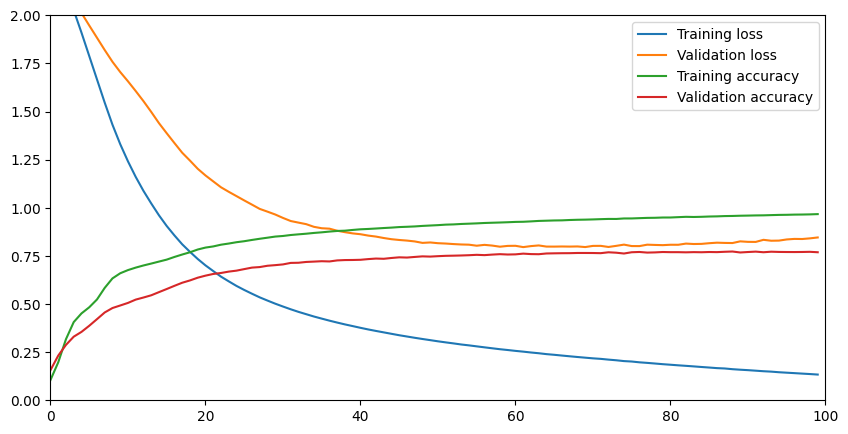

In [75]:
hist = X1e.history

plt.figure(figsize=(10,5))
plt.plot(hist['loss'], label='Training loss')
plt.plot(hist['val_loss'], label='Validation loss')
plt.plot(hist['accuracy'], label='Training accuracy')
plt.plot(hist['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.axis([0,100,0,2])
plt.show()


## 1.d)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Score:  76.9
Errors:  1155


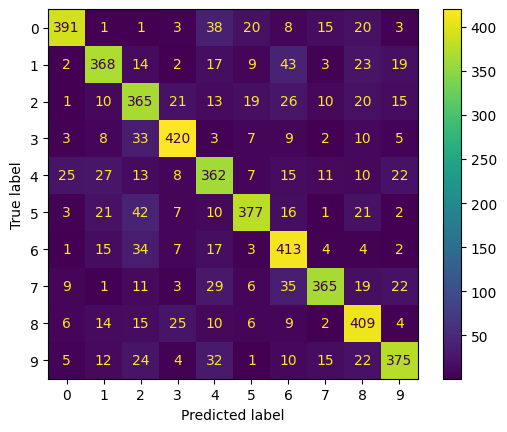

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Y2e = model.predict(X2)
y2e = np.argmax(Y2e, axis=1)

print("Score: ", np.sum(y2 == y2e) / y2.shape[0] * 100)
print("Errors: ", np.sum(y2 != y2e))

cm = confusion_matrix(y2, y2e)
ConfusionMatrixDisplay(cm).plot()


<hr style="border:2px solid black"> </hr>

# Question 2
## Consider a MLP network an architecture of your choice, using any type of layers, activation functions or other parameters  that might imporve the results. You can also perform any type of pre-processing of the $\texttt{kMNISTsmall}$ data if it helps improve performance. Train and test this network. Train and test this new network. Make sure the test results are better than in the previous question.

In [76]:
D = pickle.load(open('kMNISTsmall.p','rb'))
X1 = D.X1/255.
X2 = D.X2/255.
y1 = D.y1
y2 = D.y2

X1 = X1.reshape((10000, 784))/255.
X2 = X2.reshape((5000, 784))/255.

Y1 = keras.utils.to_categorical(y1)
Y2 = keras.utils.to_categorical(y2)

'''
pca = PCA(n_components=0.95)
x1pca = pca.fit_transform(X1)
x2pca = pca.transform(X2)'''

print(X1.shape, Y1.shape, X2.shape, Y2.shape)  
#print(x1pca.shape, Y1.shape, x2pca.shape, Y2.shape)


(10000, 784) (10000, 10) (5000, 784) (5000, 10)
(10000, 234) (10000, 10) (5000, 234) (5000, 10)


In [135]:
model2 = keras.models.Sequential()
model2.add(keras.layers.Dense(100, activation="relu", input_shape=(784,)))
model2.add(keras.layers.Dropout(0.2))
model2.add(keras.layers.Dense(50, activation="relu"))
model2.add(keras.layers.Dropout(0.2))
model2.add(keras.layers.Dense(50, activation="relu"))
model2.add(keras.layers.Dense(10, activation="softmax"))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model2.summary())

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_121 (Dense)               │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,610 (338.32 KB)

 Trainable params: 86,610 (338.32 KB)

 Non-trainable params: 0 (0.00 B)

None


In [136]:
train = model2.fit(X1, Y1, epochs=200, batch_size=5000, validation_data=(X2, Y2))

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 477ms/step - accuracy: 0.1050 - loss: 2.3024 - val_accuracy: 0.1002 - val_loss: 2.3018
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1104 - loss: 2.3014 - val_accuracy: 0.1090 - val_loss: 2.3009
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1417 - loss: 2.3002 - val_accuracy: 0.1608 - val_loss: 2.2998
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1740 - loss: 2.2989 - val_accuracy: 0.1680 - val_loss: 2.2985
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.1863 - loss: 2.2972 - val_accuracy: 0.1906 - val_loss: 2.2970
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 477ms/step - accuracy: 0.1050 - loss: 2.3024 - val_accuracy: 0.1002 - val_loss: 2.3018
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1104 - loss: 2.3014 - val_accuracy: 0.1090 - val_loss: 2.3009
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.1417 - loss: 2.3002 - val_accuracy: 0.1608 - val_los

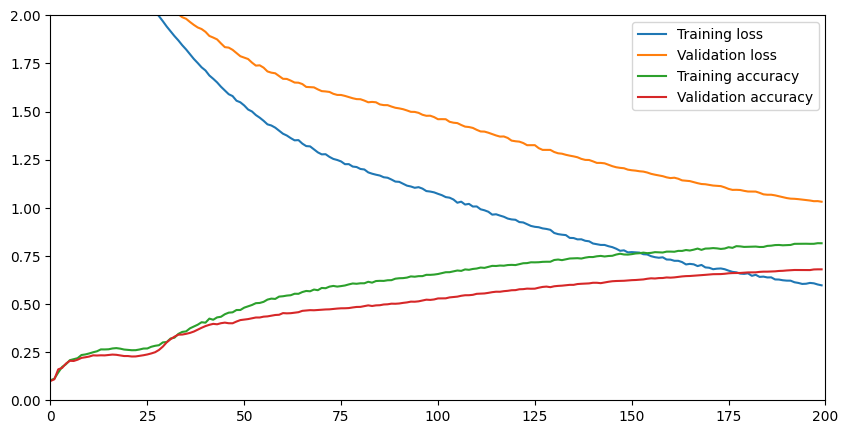

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Score:  68.02
Errors:  1599


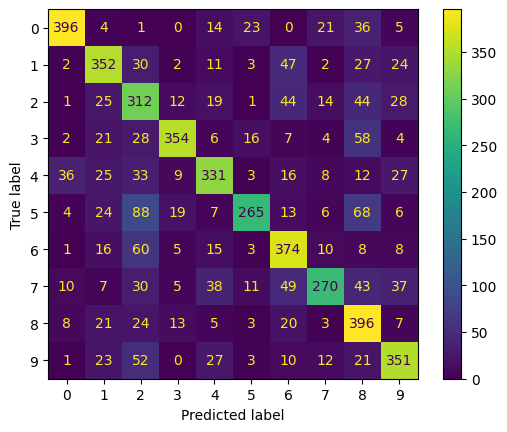

In [137]:
hist = train.history

plt.figure(figsize=(10,5))
plt.plot(hist['loss'], label='Training loss')
plt.plot(hist['val_loss'], label='Validation loss')
plt.plot(hist['accuracy'], label='Training accuracy')
plt.plot(hist['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.axis([0,200,0,2])
plt.show();

Y2e = model2.predict(X2)
y2e = np.argmax(Y2e, axis=1)

print("Score: ", np.sum(y2 == y2e) / y2.shape[0] * 100)
print("Errors: ", np.sum(y2 != y2e))

cm = confusion_matrix(y2, y2e)
ConfusionMatrixDisplay(cm).plot();

<hr style="border:2px solid black"> </hr>

# Question 3
## Consider a binary classification problem with the $\texttt{kMNISTsmall}$ dataset, where the first 3 classes (labels "0", "1" and "2") are the positive examples and the remaining classes are the negative examples.
## Use a MLP network an architecture of your choice, using any type of layers, activation functions or other parameters  that might imporve the results. You can also perform any type of pre-processing of the $\texttt{kMNISTsmall}$ data if it helps improve performance. Print the confusion matrix and the total number of erros. Also plot the ROC and precision/recall curves along with the operational point of the model.

In [99]:
y1_b = np.where(y1 <= 2, 1, 0)
y2_b = np.where(y2 <= 2, 1, 0)

X1_norm = X1 / 255.
X2_norm = X2 / 255.

print(X1.shape, y1_b.shape, X2.shape, y2_b.shape)

(10000, 784) (10000,) (5000, 784) (5000,)


In [141]:
model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=(784,)))
model3.add(keras.layers.Dense(256, activation="relu"))
model3.add(keras.layers.Dense(128, activation="relu"))
model3.add(keras.layers.Dense(64, activation="relu"))
model3.add(keras.layers.Dense(1, activation="relu"))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model3.summary())

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,177 (946.00 KB)

 Trainable params: 242,177 (946.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [142]:
hist = model3.fit(X1, y1_b, epochs=100, batch_size=5000, validation_data=(X2, y2_b))

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.6994 - loss: 1.8923 - val_accuracy: 0.7000 - val_loss: 1.0113
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.6995 - loss: 0.9763 - val_accuracy: 0.7000 - val_loss: 0.8333
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6981 - loss: 0.8187 - val_accuracy: 0.7000 - val_loss: 0.7366
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6979 - loss: 0.7285 - val_accuracy: 0.7000 - val_loss: 0.6769
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.7007 - loss: 0.6672 - val_accuracy: 0.7000 - val_loss: 0.6409
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6992 - loss: 0.6368 - val_accuracy: 0.7000 - val_loss: 0.6222
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6993 - loss: 0.6208 - val_accuracy: 0.7000 - val_loss: 0.6169
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.7002 - loss: 0.6156 - val_accuracy: 0.7000 - val_loss

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Errors:  1055


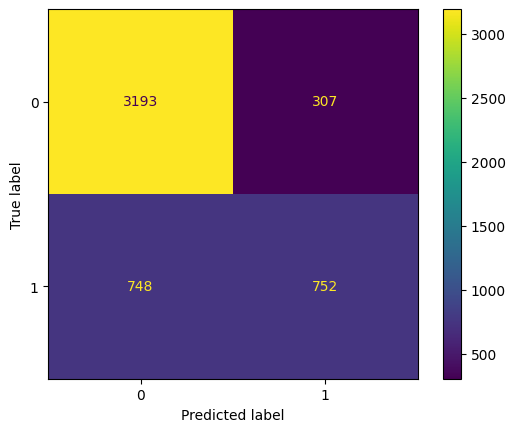

In [175]:
y2p = model3.predict(X2)
y2p_b = np.where(y2p > 0.5, 1, 0).squeeze()

cm = confusion_matrix(y2_b, y2p > 0.5)
ConfusionMatrixDisplay(cm).plot(); 

print("Errors: ", np.sum(y2_b != y2p_b))

<Figure size 640x480 with 0 Axes>

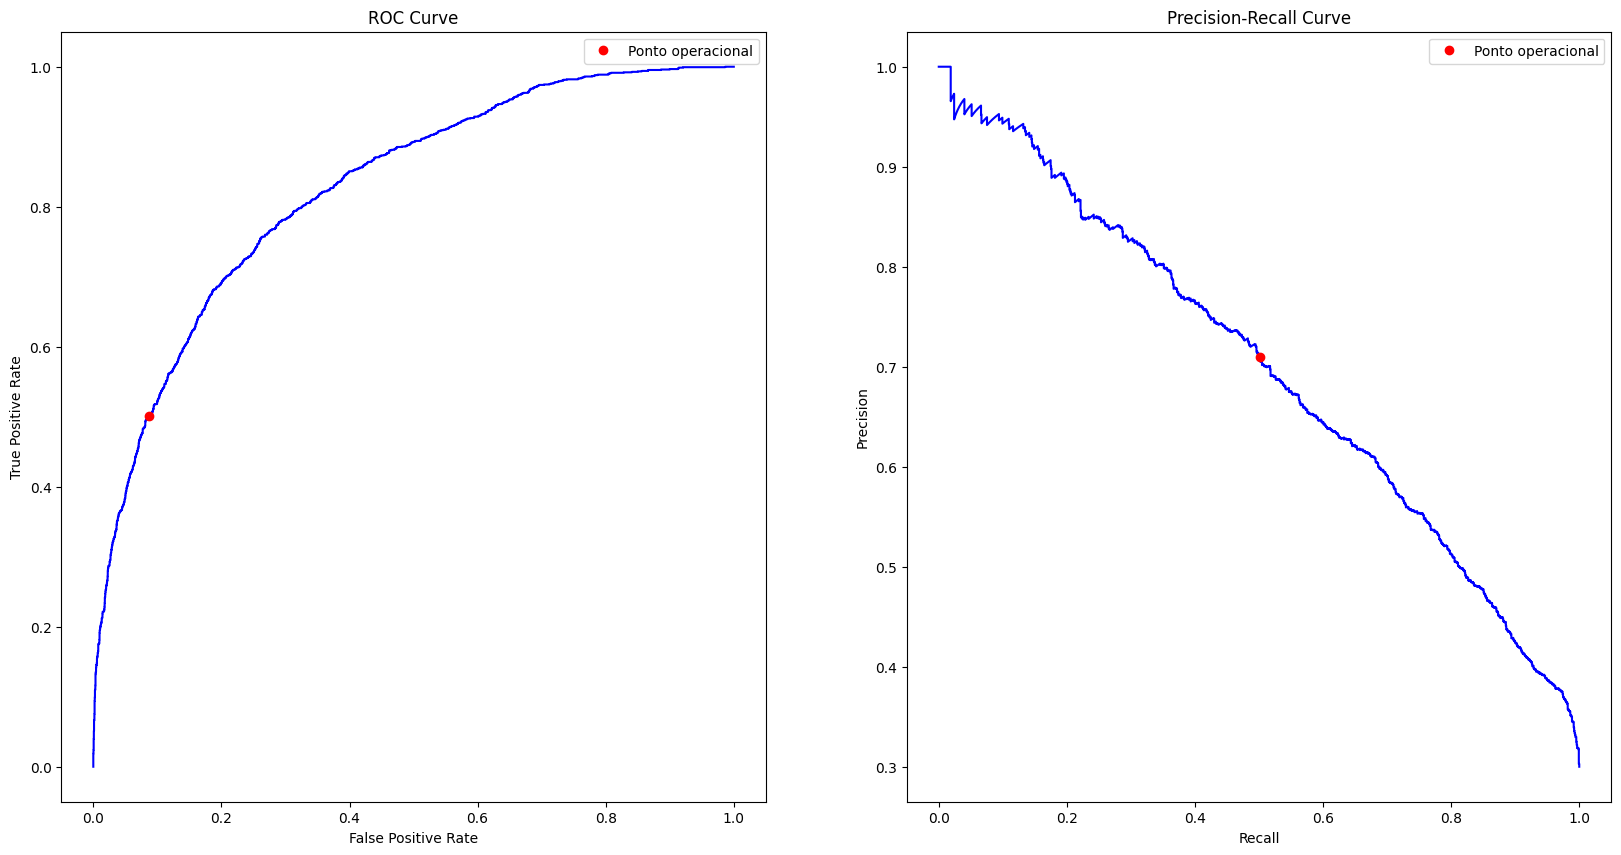

In [176]:
fp = cm[0, 1] / (cm[0, 1] + cm[0, 0])
tp = cm[1, 1] / (cm[1, 1] + cm[1, 0])
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])


fpr,tpr,t = roc_curve(y2_b, y2p)
prec, rec, _ = precision_recall_curve(y2_b, y2p)

plt.figure()
plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(121)
plt.plot(fpr,tpr, '-b')
plt.plot(fp,tp,'or', label='Ponto operacional')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.subplot(122)
plt.plot(rec, prec,'-b')
plt.plot(recall,precision,'or', label='Ponto operacional')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show();